<a href="https://colab.research.google.com/github/cybermin/2022_BSSM/blob/main/02_pandas_basic_%ED%95%B4%EA%B2%B0%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


RFID기반 음식물쓰레기 종량제 시스템을 채택한 지자체의  2017년7월~2020년7월까지의 지자체별 RFID음식물쓰레기 배출량를 분석하시오.

+ 광역시도별 음식물 쓰레기 배출량
+ 광역시도별 자료건수
+ 부산광역시 지지체별 음식물 쓰레기 배출량
+ 해운대구 월별 음식물 쓰레기 배출량


---

In [2]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

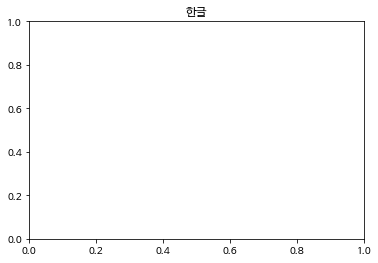

In [2]:
plt.title('한글')
plt.show()

## 1. 데이터불러오기



In [3]:
#pandas 라이브러리 추가
import pandas as pd

In [8]:
#데이터불러오기
df = pd.read_csv('/content/drive/MyDrive/BSSM/BSSM2022/data/지자체별 RFID음식물쓰레기 배출량.csv', engine='python', encoding='cp949')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#열명변경 : 배출연도->연도, 배출월->월, 배출량(톤)->배출량
print(list(df.columns))
lt = list(df.columns)
lt[0] = '연도'
lt[1] = '월'
lt[-1] = '배출량'
df.columns = lt
print(df.columns)

['배출연도', '배출월', '광역시도', '기초지자체', '배출량(톤)']
Index(['연도', '월', '광역시도', '기초지자체', '배출량'], dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      5195 non-null   int64 
 1   월       5195 non-null   int64 
 2   광역시도    5195 non-null   object
 3   기초지자체   5195 non-null   object
 4   배출량     5195 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 203.1+ KB


In [11]:
df[(df['연도'] == 2020) & (df['광역시도']=='서울특별시')]

,연도,월,광역시도,기초지자체,배출량
4281,2020,1,서울특별시,종로구,109999
4282,2020,1,서울특별시,중구,203171
4283,2020,1,서울특별시,용산구,16020
4284,2020,1,서울특별시,성동구,479129
4285,2020,1,서울특별시,광진구,254794
...,...,...,...,...,...
5062,2020,7,서울특별시,관악구,344653
5063,2020,7,서울특별시,서초구,538024
5064,2020,7,서울특별시,강남구,202762
5065,2020,7,서울특별시,강동구,920723


In [12]:
df[(df['광역시도'] == '부산광역시') | (df['광역시도']=='경상남도') | (df['광역시도'] == '경상북도')]

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5188,2020,7,경상남도,양산시,779858
5189,2020,7,경상남도,의령군,6031
5190,2020,7,경상남도,창녕군,169073
5191,2020,7,경상남도,고성군,39642


In [13]:
df[df['광역시도'].isin(['부산광역시','경상남도','경상북도']) & (df['연도'] == 2019)]

,연도,월,광역시도,기초지자체,배출량
2519,2019,1,부산광역시,중구,7425
2520,2019,1,부산광역시,서구,94938
2521,2019,1,부산광역시,동구,53881
2522,2019,1,부산광역시,영도구,155276
2523,2019,1,부산광역시,부산진구,599766
...,...,...,...,...,...
4274,2019,12,경상남도,양산시,654587
4275,2019,12,경상남도,의령군,4918
4276,2019,12,경상남도,창녕군,152944
4277,2019,12,경상남도,고성군,32333


In [14]:
df[df['광역시도'].isin(['부산광역시']) & (df['기초지자체'].isin(['기장군', '영도구'])) & (df['연도'] == 2020)]

,연도,월,광역시도,기초지자체,배출량
4309,2020,1,부산광역시,영도구,182283
4321,2020,1,부산광역시,기장군,391393
4461,2020,3,부산광역시,영도구,163714
4473,2020,3,부산광역시,기장군,377140
4613,2020,4,부산광역시,영도구,153040
4625,2020,4,부산광역시,기장군,363859
4765,2020,5,부산광역시,영도구,172082
4777,2020,5,부산광역시,기장군,426139
4917,2020,6,부산광역시,영도구,176270
4929,2020,6,부산광역시,기장군,447228


## 2. 광역시도별 배출량

In [15]:
import seaborn as sns

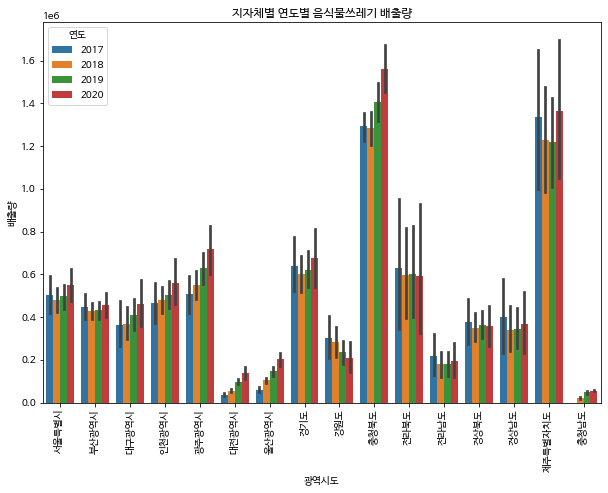

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x='광역시도', y='배출량', hue='연도', data=df)
plt.xticks(rotation=90)
plt.title('지자체별 연도별 음식물쓰레기 배출량')
plt.show()

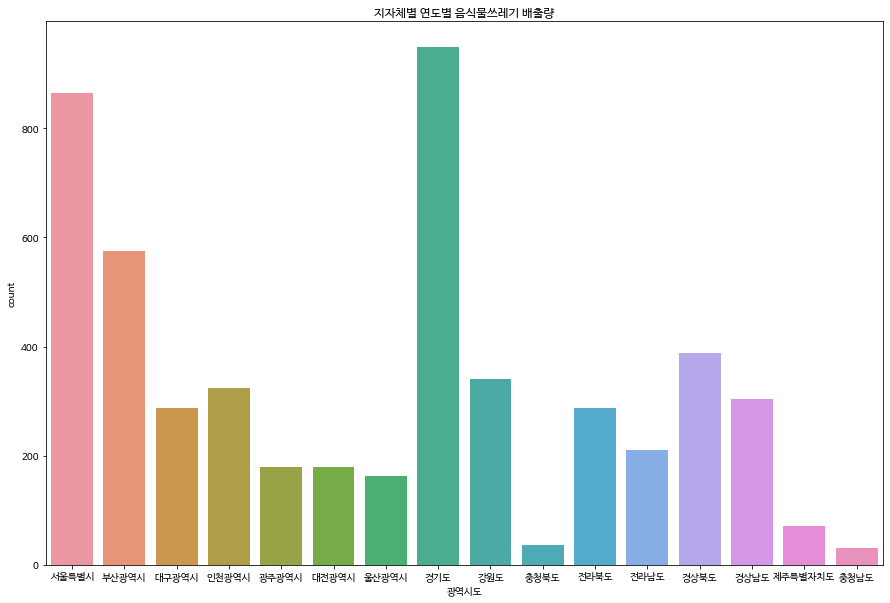

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x ='광역시도',data=df)
plt.title('지자체별 연도별 음식물쓰레기 배출량')
plt.show()

## 3.광역시도별 자료 건수

In [18]:
df2 = df[df['광역시도']=='부산광역시']
df2

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5078,2020,7,부산광역시,강서구,428097
5079,2020,7,부산광역시,연제구,474435
5080,2020,7,부산광역시,수영구,335382
5081,2020,7,부산광역시,사상구,626469


## 4.부산광역시 지자체별 음식물 쓰레기 배출량

In [19]:
df2 = df[df['광역시도']=='부산광역시']
df2

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5078,2020,7,부산광역시,강서구,428097
5079,2020,7,부산광역시,연제구,474435
5080,2020,7,부산광역시,수영구,335382
5081,2020,7,부산광역시,사상구,626469


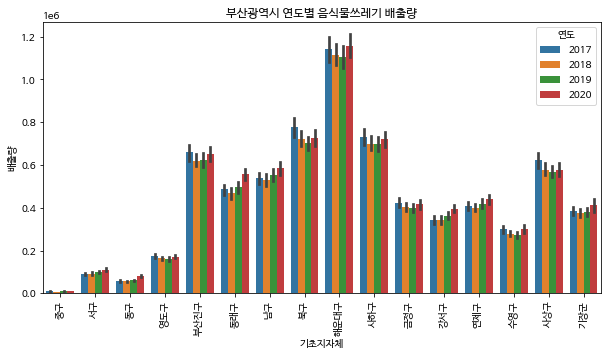

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='기초지자체', y='배출량', hue='연도', data=df2)
plt.xticks(rotation=90)
plt.title('부산광역시 연도별 음식물쓰레기 배출량')
plt.show()

In [21]:
df3 = df[df['기초지자체']=='해운대구']
df3

,연도,월,광역시도,기초지자체,배출량
30,2017,7,부산광역시,해운대구,1248638
161,2017,8,부산광역시,해운대구,1136856
292,2017,9,부산광역시,해운대구,1010415
425,2017,10,부산광역시,해운대구,1175343
559,2017,11,부산광역시,해운대구,1092730
693,2017,12,부산광역시,해운대구,1186786
829,2018,1,부산광역시,해운대구,1065273
965,2018,2,부산광역시,해운대구,1025616
1101,2018,3,부산광역시,해운대구,1047523
1239,2018,4,부산광역시,해운대구,1000967


In [1]:
plt.figure(figsize=(10,5))
sns.barplot(x='월', y='배출량', data=df3)
plt.title('해운대구 월별 음식물쓰레기 배출량')
plt.show()

NameError: ignored